# 95-865 Unstructured Data Analysis

# Part 1. Exploratory data analysis

### Identify structure present in "unstrcture" data

- Frequency and co-occurrence analysis
- Visualizing high-dimensional data/dimensionality reduction
- Clustering
- Topic modeling

## Frequency Analysis

### Basic Text Processing with spaCy

In [7]:
import spacy
nlp = spacy.load('en_core_web_sm') # load spaCy's built-in English models

In [8]:
type(nlp)

spacy.lang.en.English

In [9]:
text = open('opioid_epidemic.txt').read() # open text file of text from opioid epidemic Wikipedia page
print(text)

The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs in the United States and Canada in the 2010s. Opioids are a diverse class of moderately strong painkillers, including oxycodone (commonly sold under the trade names OxyContin and Percocet), hydrocodone (Vicodin), and a very strong painkiller, fentanyl, which is synthesized to resemble other opiates such as opium-derived morphine and heroin. The potency and availability of these substances, despite their high risk of addiction and overdose, have made them popular both as formal medical treatments and as recreational drugs. Due to their sedative effects on the part of the brain which regulates breathing, opioids in high doses present the potential for respiratory depression, and may cause respiratory failure and death.[2]

According to the U.S. Drug Enforcement Administration, "overdose deaths, particularly from prescription drugs and heroin, have reached epidemic level

In [10]:
parsed_text = nlp(text)
print(parsed_text)

The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs in the United States and Canada in the 2010s. Opioids are a diverse class of moderately strong painkillers, including oxycodone (commonly sold under the trade names OxyContin and Percocet), hydrocodone (Vicodin), and a very strong painkiller, fentanyl, which is synthesized to resemble other opiates such as opium-derived morphine and heroin. The potency and availability of these substances, despite their high risk of addiction and overdose, have made them popular both as formal medical treatments and as recreational drugs. Due to their sedative effects on the part of the brain which regulates breathing, opioids in high doses present the potential for respiratory depression, and may cause respiratory failure and death.[2]

According to the U.S. Drug Enforcement Administration, "overdose deaths, particularly from prescription drugs and heroin, have reached epidemic level

#### Determine Vocabulary

For simplicity, let's build a vocabulary without using lemmatization and without removing stop words.

In [13]:
word_to_idx = {}  # key: vocabulary word
                  # value: unique integer index assigned to the vocabulary word (starting at 0)
current_word_idx = 0

for token in parsed_text:
    word = token.orth_
    if word not in word_to_idx:
        word_to_idx[word] = current_word_idx
        current_word_idx += 1

vocab_size = current_word_idx  # you can check that indeed `vocab_size` is equal to `len(word_to_idx)`
print(f'Found {vocab_size} vocabulary words')

Found 2073 vocabulary words


In [14]:
vocab = [None] * vocab_size
for word, idx in word_to_idx.items():
    vocab[idx] = word

In [15]:
vocab

['The',
 'opioid',
 'epidemic',
 'or',
 'crisis',
 'is',
 'the',
 'rapid',
 'increase',
 'in',
 'use',
 'of',
 'prescription',
 'and',
 'non',
 '-',
 'drugs',
 'United',
 'States',
 'Canada',
 '2010s',
 '.',
 'Opioids',
 'are',
 'a',
 'diverse',
 'class',
 'moderately',
 'strong',
 'painkillers',
 ',',
 'including',
 'oxycodone',
 '(',
 'commonly',
 'sold',
 'under',
 'trade',
 'names',
 'OxyContin',
 'Percocet',
 ')',
 'hydrocodone',
 'Vicodin',
 'very',
 'painkiller',
 'fentanyl',
 'which',
 'synthesized',
 'to',
 'resemble',
 'other',
 'opiates',
 'such',
 'as',
 'opium',
 'derived',
 'morphine',
 'heroin',
 'potency',
 'availability',
 'these',
 'substances',
 'despite',
 'their',
 'high',
 'risk',
 'addiction',
 'overdose',
 'have',
 'made',
 'them',
 'popular',
 'both',
 'formal',
 'medical',
 'treatments',
 'recreational',
 'Due',
 'sedative',
 'effects',
 'on',
 'part',
 'brain',
 'regulates',
 'breathing',
 'opioids',
 'doses',
 'present',
 'potential',
 'for',
 'respiratory',

#### Converting text to word indices and from word inices back to text

In [17]:
word_indices = [word_to_idx[token.orth_] for token in parsed_text]

In [18]:
word_indices

[0,
 1,
 2,
 3,
 1,
 4,
 5,
 6,
 7,
 8,
 9,
 6,
 10,
 11,
 12,
 13,
 14,
 15,
 12,
 1,
 16,
 9,
 6,
 17,
 18,
 13,
 19,
 9,
 6,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 11,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 6,
 37,
 38,
 39,
 13,
 40,
 41,
 30,
 42,
 33,
 43,
 41,
 30,
 13,
 24,
 44,
 28,
 45,
 30,
 46,
 30,
 47,
 5,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 15,
 56,
 57,
 13,
 58,
 21,
 0,
 59,
 13,
 60,
 11,
 61,
 62,
 30,
 63,
 64,
 65,
 66,
 11,
 67,
 13,
 68,
 30,
 69,
 70,
 71,
 72,
 73,
 54,
 74,
 75,
 76,
 13,
 54,
 77,
 16,
 21,
 78,
 49,
 64,
 79,
 80,
 81,
 6,
 82,
 11,
 6,
 83,
 47,
 84,
 85,
 30,
 86,
 9,
 65,
 87,
 88,
 6,
 89,
 90,
 91,
 92,
 30,
 13,
 93,
 94,
 91,
 95,
 13,
 96,
 97,
 98,
 99,
 49,
 6,
 100,
 101,
 102,
 103,
 30,
 104,
 68,
 105,
 30,
 106,
 107,
 12,
 16,
 13,
 58,
 30,
 69,
 108,
 2,
 109,
 21,
 110,
 111,
 112,
 11,
 113,
 1,
 68,
 105,
 9,
 114,
 115,
 12,
 116,
 97,
 117,
 118,
 49,
 119,
 30,
 68,
 120,
 121,
 30,
 122,
 30,
 13,
 123

In [19]:
[vocab[idx] for idx in word_indices]

['The',
 'opioid',
 'epidemic',
 'or',
 'opioid',
 'crisis',
 'is',
 'the',
 'rapid',
 'increase',
 'in',
 'the',
 'use',
 'of',
 'prescription',
 'and',
 'non',
 '-',
 'prescription',
 'opioid',
 'drugs',
 'in',
 'the',
 'United',
 'States',
 'and',
 'Canada',
 'in',
 'the',
 '2010s',
 '.',
 'Opioids',
 'are',
 'a',
 'diverse',
 'class',
 'of',
 'moderately',
 'strong',
 'painkillers',
 ',',
 'including',
 'oxycodone',
 '(',
 'commonly',
 'sold',
 'under',
 'the',
 'trade',
 'names',
 'OxyContin',
 'and',
 'Percocet',
 ')',
 ',',
 'hydrocodone',
 '(',
 'Vicodin',
 ')',
 ',',
 'and',
 'a',
 'very',
 'strong',
 'painkiller',
 ',',
 'fentanyl',
 ',',
 'which',
 'is',
 'synthesized',
 'to',
 'resemble',
 'other',
 'opiates',
 'such',
 'as',
 'opium',
 '-',
 'derived',
 'morphine',
 'and',
 'heroin',
 '.',
 'The',
 'potency',
 'and',
 'availability',
 'of',
 'these',
 'substances',
 ',',
 'despite',
 'their',
 'high',
 'risk',
 'of',
 'addiction',
 'and',
 'overdose',
 ',',
 'have',
 'made

#### Computing raw count frequencies using one hot encoded vectors

In [21]:
import numpy as np

one_hot_encoded_vectors = []
for token in parsed_text:
    word = token.orth_

    one_hot_encoded_vector = np.zeros(vocab_size)  # all zeros; length of vector is the vocabulary size
    one_hot_encoded_vector[word_to_idx[word]] = 1  # set the current word's index to have a value of 1

    one_hot_encoded_vectors.append(one_hot_encoded_vector)

In [22]:
one_hot_encoded_vectors[0]

array([1., 0., 0., ..., 0., 0., 0.])

In [23]:
one_hot_encoded_vectors = np.array(one_hot_encoded_vectors)  # convert Python list of 1D arrays into NumPy 2D array

In [24]:
one_hot_encoded_vectors.shape

(7711, 2073)

In [25]:
raw_counts = one_hot_encoded_vectors.sum(axis=0) # axis=0: across the rows, axis=1: across the column, axis=2: across depth (in case of 3D)
raw_counts.shape

(2073,)

In [26]:
raw_counts

array([36., 67., 19., ...,  1.,  1.,  1.])

In [27]:
list(zip(raw_counts, vocab)) # zip function: zip(a, b) pairs according to index

[(np.float64(36.0), 'The'),
 (np.float64(67.0), 'opioid'),
 (np.float64(19.0), 'epidemic'),
 (np.float64(23.0), 'or'),
 (np.float64(15.0), 'crisis'),
 (np.float64(49.0), 'is'),
 (np.float64(224.0), 'the'),
 (np.float64(2.0), 'rapid'),
 (np.float64(4.0), 'increase'),
 (np.float64(113.0), 'in'),
 (np.float64(17.0), 'use'),
 (np.float64(152.0), 'of'),
 (np.float64(20.0), 'prescription'),
 (np.float64(142.0), 'and'),
 (np.float64(3.0), 'non'),
 (np.float64(66.0), '-'),
 (np.float64(17.0), 'drugs'),
 (np.float64(12.0), 'United'),
 (np.float64(9.0), 'States'),
 (np.float64(5.0), 'Canada'),
 (np.float64(1.0), '2010s'),
 (np.float64(190.0), '.'),
 (np.float64(6.0), 'Opioids'),
 (np.float64(26.0), 'are'),
 (np.float64(110.0), 'a'),
 (np.float64(1.0), 'diverse'),
 (np.float64(3.0), 'class'),
 (np.float64(1.0), 'moderately'),
 (np.float64(3.0), 'strong'),
 (np.float64(6.0), 'painkillers'),
 (np.float64(476.0), ','),
 (np.float64(7.0), 'including'),
 (np.float64(4.0), 'oxycodone'),
 (np.float64(34

In [28]:
sorted(zip(raw_counts, vocab), reverse=True) # sorted(), reverse=True: Desc, default: index 0 is the row count

[(np.float64(476.0), ','),
 (np.float64(224.0), 'the'),
 (np.float64(190.0), '.'),
 (np.float64(188.0), '"'),
 (np.float64(186.0), 'to'),
 (np.float64(152.0), 'of'),
 (np.float64(152.0), '\n'),
 (np.float64(143.0), ']'),
 (np.float64(142.0), 'and'),
 (np.float64(113.0), 'in'),
 (np.float64(110.0), 'a'),
 (np.float64(89.0), 'up'),
 (np.float64(87.0), '^'),
 (np.float64(87.0), 'Jump'),
 (np.float64(78.0), '2017'),
 (np.float64(67.0), 'opioid'),
 (np.float64(67.0), ':'),
 (np.float64(66.0), '-'),
 (np.float64(54.0), 'for'),
 (np.float64(49.0), 'is'),
 (np.float64(48.0), 'In'),
 (np.float64(43.0), 'drug'),
 (np.float64(39.0), '\n\n'),
 (np.float64(38.0), 'from'),
 (np.float64(36.0), 'with'),
 (np.float64(36.0), 'heroin'),
 (np.float64(36.0), 'The'),
 (np.float64(35.0), 'that'),
 (np.float64(35.0), '2016'),
 (np.float64(34.0), 'as'),
 (np.float64(34.0), '('),
 (np.float64(32.0), 'by'),
 (np.float64(30.0), 'on'),
 (np.float64(30.0), 'Opioid'),
 (np.float64(30.0), ')'),
 (np.float64(28.0), 'b

Example: Representing different sentences each as its own feature vector of raw counts

In [30]:
sentence_feature_vectors = []
sentences = []
for sentence in parsed_text.sents:
    sentences.append(sentence.orth_)

    sentence_raw_counts = np.zeros(vocab_size)
    for token in sentence:
        word = token.orth_
        sentence_raw_counts[word_to_idx[word]] += 1 # constructing term frequency, raw counts
    sentence_feature_vectors.append(sentence_raw_counts)

In [31]:
sentences[0]

'The opioid epidemic or opioid crisis is the rapid increase in the use of prescription and non-prescription opioid drugs in the United States and Canada in the 2010s.'

In [32]:
sentence_feature_vectors[0]

array([1., 3., 1., ..., 0., 0., 0.])

In [33]:
len(sentences)

266

In [34]:
for word, count in zip(vocab, sentence_feature_vectors[100]): # pairing vocabulary words
    if count > 0:
        print(word, ':', count)

and : 1.0
drugs : 1.0
. : 1.0
are : 1.0
a : 1.0
, : 3.0
potential : 1.0
for : 1.0
In : 1.0
more : 1.0
had : 1.0
addicts : 1.0
what : 1.0
often : 1.0
white : 1.0
they : 2.0
using : 1.0
became : 1.0
addicted : 1.0
how : 1.0
longer : 1.0
' : 1.0
allowing : 1.0
newspapers : 1.0
stories : 1.0
given : 1.0
space : 1.0
backstory : 1.0
explaining : 1.0
before : 1.0


The code below re-creates the histogram plot from the previous demo (that uses lemmatization and stop 

In [36]:
word_to_idx = {}  # key: vocabulary word
                  # value: unique integer index assigned to the vocabulary word (starting at 0)
current_word_idx = 0

for token in parsed_text:
    word = token.lemma_.lower()
    if not (nlp.vocab[word].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or token.pos_ == 'X'):
        if word not in word_to_idx:
            word_to_idx[word] = current_word_idx
            current_word_idx += 1

vocab_size = current_word_idx  # you can check that indeed `vocab_size` is equal to `len(word_to_idx)`
print(f'Found {vocab_size} vocabulary words')

vocab = [''] * vocab_size
for word, idx in word_to_idx.items():
    vocab[idx] = word

one_hot_encoded_vectors = []
for token in parsed_text:
    word = token.lemma_.lower()
    if not (nlp.vocab[word].is_stop or token.pos_ == 'PUNCT' or token.pos_ == 'SPACE' or token.pos_ == 'X'):
        one_hot_encoded_vector = np.zeros(vocab_size)  # all zeros; length of vector is the vocabulary size
        one_hot_encoded_vector[word_to_idx[word]] = 1  # set the current word's index to have a value of 1

        one_hot_encoded_vectors.append(one_hot_encoded_vector)

one_hot_encoded_vectors = np.array(one_hot_encoded_vectors)  # convert Python list of 1D arrays into NumPy 2D array
raw_counts = one_hot_encoded_vectors.sum(axis=0)

Found 1493 vocabulary words


In [37]:
sorted(zip(raw_counts, vocab), reverse=True)

[(np.float64(123.0), 'opioid'),
 (np.float64(87.0), 'jump'),
 (np.float64(87.0), '^'),
 (np.float64(82.0), 'drug'),
 (np.float64(78.0), '2017'),
 (np.float64(44.0), 'heroin'),
 (np.float64(42.0), 'overdose'),
 (np.float64(39.0), 'prescription'),
 (np.float64(36.0), 'addiction'),
 (np.float64(35.0), 'death'),
 (np.float64(35.0), '2016'),
 (np.float64(34.0), 'use'),
 (np.float64(30.0), 'fentanyl'),
 (np.float64(29.0), 'treatment'),
 (np.float64(26.0), 'crisis'),
 (np.float64(23.0), 'march'),
 (np.float64(23.0), 'epidemic'),
 (np.float64(23.0), '-'),
 (np.float64(20.0), 'u.s.'),
 (np.float64(20.0), 'b'),
 (np.float64(20.0), 'abuse'),
 (np.float64(19.0), 'state'),
 (np.float64(19.0), 'doctor'),
 (np.float64(18.0), 'people'),
 (np.float64(17.0), 'retrieve'),
 (np.float64(17.0), 'new'),
 (np.float64(17.0), 'cdc'),
 (np.float64(15.0), 'pain'),
 (np.float64(15.0), 'june'),
 (np.float64(15.0), 'increase'),
 (np.float64(13.0), 'prescribe'),
 (np.float64(13.0), 'patient'),
 (np.float64(13.0), 'ju

In [38]:
manual_stop_words = {'jump', 'b', '-', '^'}
manual_stop_word_indices = [word_to_idx[word] for word in manual_stop_words]

In [39]:
manual_stop_word_indices

[1151, 8, 1149, 1150]

In [40]:
vocab = [word for word in vocab if word not in manual_stop_words]
one_hot_encoded_vectors = np.delete(one_hot_encoded_vectors, manual_stop_word_indices, axis=1)
raw_counts = one_hot_encoded_vectors.sum(axis=0)

In [41]:
sorted(zip(raw_counts, vocab), reverse=True)

[(np.float64(123.0), 'opioid'),
 (np.float64(82.0), 'drug'),
 (np.float64(78.0), '2017'),
 (np.float64(44.0), 'heroin'),
 (np.float64(42.0), 'overdose'),
 (np.float64(39.0), 'prescription'),
 (np.float64(36.0), 'addiction'),
 (np.float64(35.0), 'death'),
 (np.float64(35.0), '2016'),
 (np.float64(34.0), 'use'),
 (np.float64(30.0), 'fentanyl'),
 (np.float64(29.0), 'treatment'),
 (np.float64(26.0), 'crisis'),
 (np.float64(23.0), 'march'),
 (np.float64(23.0), 'epidemic'),
 (np.float64(20.0), 'u.s.'),
 (np.float64(20.0), 'abuse'),
 (np.float64(19.0), 'state'),
 (np.float64(19.0), 'doctor'),
 (np.float64(18.0), 'people'),
 (np.float64(17.0), 'retrieve'),
 (np.float64(17.0), 'new'),
 (np.float64(17.0), 'cdc'),
 (np.float64(15.0), 'pain'),
 (np.float64(15.0), 'june'),
 (np.float64(15.0), 'increase'),
 (np.float64(13.0), 'prescribe'),
 (np.float64(13.0), 'patient'),
 (np.float64(13.0), 'july'),
 (np.float64(13.0), 'addict'),
 (np.float64(12.0), 'united'),
 (np.float64(12.0), 'trump'),
 (np.floa

In [42]:
top_counts, top_words = zip(*sorted(zip(raw_counts, vocab), reverse=True))

Text(0, 0.5, 'Raw count')

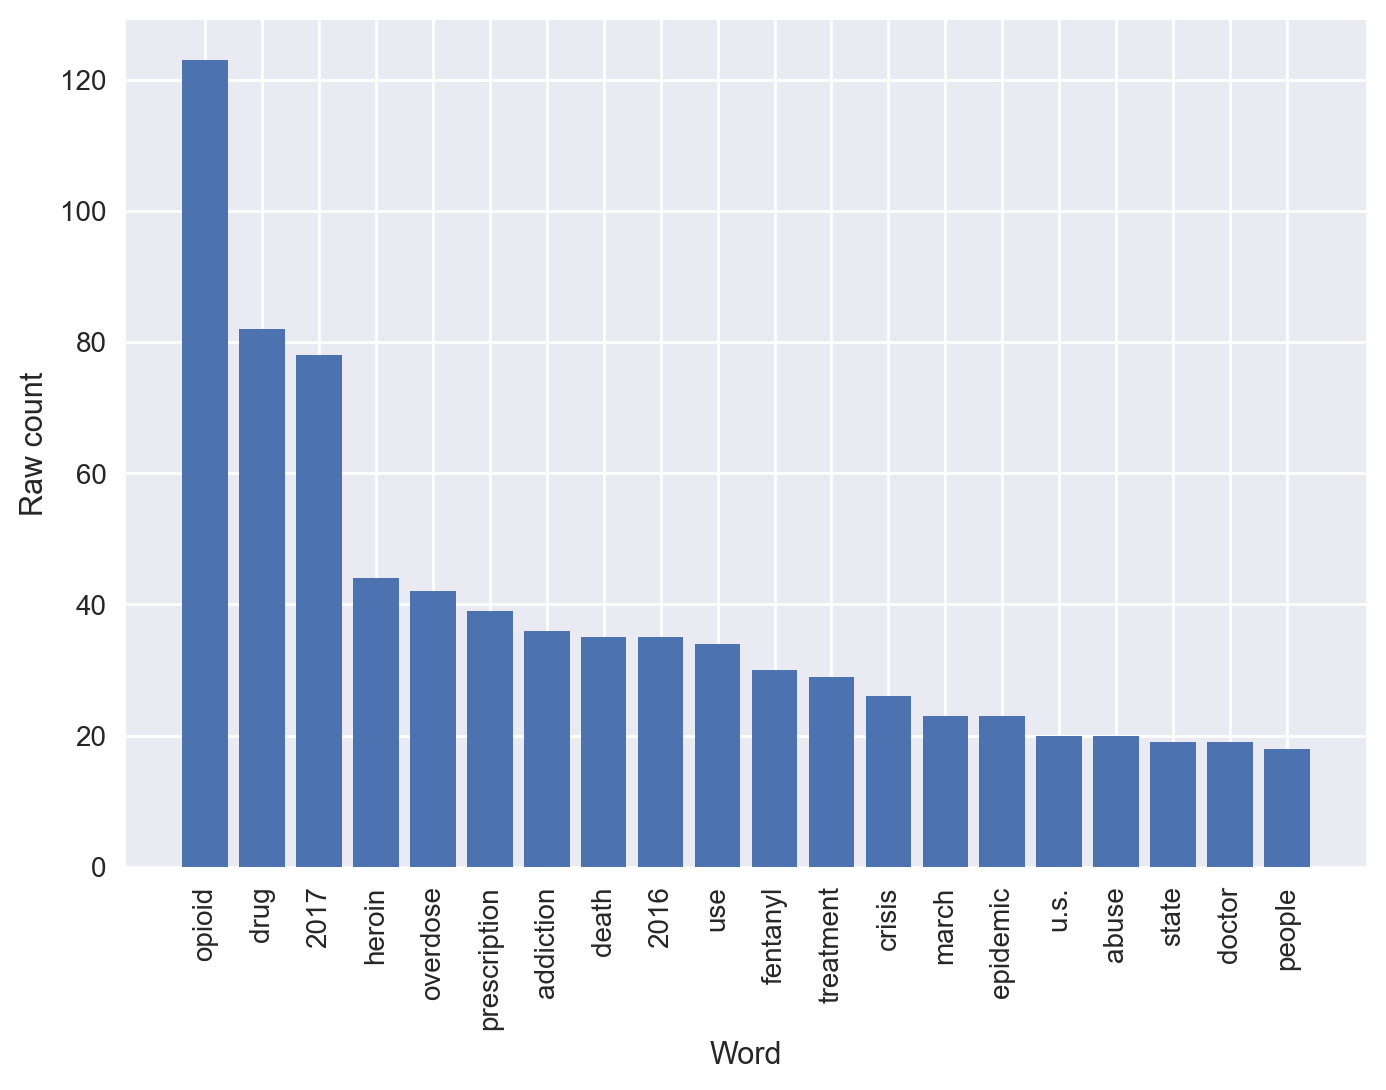

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')  # prettier plots (for example, use 'ggplot' instead of 'seaborn' for plots like in R)
%config InlineBackend.figure_format = 'retina'  # if you use a Mac with Retina display

num_top_words_to_plot = 20
plt.bar(range(num_top_words_to_plot), top_counts[:num_top_words_to_plot])
plt.xticks(range(num_top_words_to_plot), top_words[:num_top_words_to_plot], rotation=90)
plt.xlabel('Word')
plt.ylabel('Raw count')